# RNN by Rupin Patel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")

In [3]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"6,23,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"7,89,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"11,53,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"7,44,300"


In [4]:
train_set = dataset_train.iloc[:,1:2].values

In [5]:
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_training = sc.fit_transform(train_set)

In [7]:
scaled_training

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
x_train = []
y_train = []
for i in range(10,1258):
    x_train.append(scaled_training[i-10:i,0])
    y_train.append(scaled_training[i,0])

In [9]:
x_train,y_train = np.array(x_train),np.array(y_train)

x_train.shape
y_train.shape

print(x_train.ndim, y_train.ndim)

2 1


In [10]:

x_train = np.reshape(x_train,(1248,10,1))

In [11]:
x_train.shape

(1248, 10, 1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,LSTM,Dropout
model = Sequential()
model.add(LSTM( units = 10 ,return_sequences = True , input_shape = (60,1)))
model.add(Dropout(0.2))
model.add(LSTM( units = 10 ,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 10 , return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 10 ))
model.add(Dropout(0.2))

In [13]:
model.add(Dense(units =1))
model.compile("rmsprop",loss = "mean_squared_error")
model.fit(x_train,y_train,epochs = 1000)

Epoch 1/1000
39/39 [==============================] - 7s 13ms/step - loss: 0.0997
Epoch 2/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0207
Epoch 3/1000
39/39 [==============================] - 1s 13ms/step - loss: 0.0174
Epoch 4/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.0149
Epoch 5/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.0144
Epoch 6/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0129
Epoch 7/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.0107
Epoch 8/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0101
Epoch 9/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0089
Epoch 10/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0089
Epoch 11/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0089
Epoch 12/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0084
Epoch 13/1000

39/39 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 192/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0035
Epoch 193/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0032
Epoch 194/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 195/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0035
Epoch 196/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 197/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 198/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 199/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0034
Epoch 200/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 201/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 202/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 203/1000
39/3

39/39 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 388/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 389/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 390/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 391/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 392/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 393/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 394/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 395/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 396/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 397/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 398/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 399/1000
39/3

39/39 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 584/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 585/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 586/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 587/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 588/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 589/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 590/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 591/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 592/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 593/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 594/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 595/1000
39/3

39/39 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 780/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 781/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 782/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 783/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 784/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 785/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 786/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 787/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 788/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 789/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 790/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 791/1000
39/3

39/39 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 976/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 977/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 978/1000
39/39 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 979/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 980/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 981/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 982/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 983/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 984/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 985/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 986/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 987/1000
39/3

In [14]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
y_test = dataset_test.iloc[:,1:2]

In [32]:
y_test=y_test.head(20)
y_test.shape

(20, 1)

In [15]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [16]:
dataset_test.shape

(30, 6)

In [17]:
dataset_total = pd.concat((dataset_train["Open"],dataset_test["Open"]),axis = 0)
inputs  = dataset_total[len(dataset_total)-len(dataset_test)- 10:].values
inputs = inputs.reshape(-1,1)

In [18]:
inputs = sc.fit_transform(inputs)



In [19]:
inputs

array([[0.93058468],
       [0.9116954 ],
       [0.92383055],
       [0.92212347],
       [0.91566623],
       [0.91295716],
       [0.91254894],
       [0.91815264],
       [0.8989108 ],
       [0.8978346 ],
       [0.89052382],
       [0.90824411],
       [0.90401351],
       [0.92104726],
       [0.94171785],
       [0.94442692],
       [0.93912011],
       [0.94309094],
       [0.94372182],
       [0.94297961],
       [0.94062309],
       [0.93934277],
       [0.94266417],
       [0.94329505],
       [0.97122075],
       [0.98480322],
       [1.        ],
       [0.99424786],
       [0.95704451],
       [0.92401611],
       [0.01718219],
       [0.02057781],
       [0.02033659],
       [0.01888928],
       [0.00744067],
       [0.00836843],
       [0.00927764],
       [0.00734789],
       [0.        ],
       [0.0080901 ]])

In [20]:
x_test = []
for i in range(10,30):
    x_test.append(inputs[i-10:i,0])
x_test = np.array(x_test)
x_test

array([[0.93058468, 0.9116954 , 0.92383055, 0.92212347, 0.91566623,
        0.91295716, 0.91254894, 0.91815264, 0.8989108 , 0.8978346 ],
       [0.9116954 , 0.92383055, 0.92212347, 0.91566623, 0.91295716,
        0.91254894, 0.91815264, 0.8989108 , 0.8978346 , 0.89052382],
       [0.92383055, 0.92212347, 0.91566623, 0.91295716, 0.91254894,
        0.91815264, 0.8989108 , 0.8978346 , 0.89052382, 0.90824411],
       [0.92212347, 0.91566623, 0.91295716, 0.91254894, 0.91815264,
        0.8989108 , 0.8978346 , 0.89052382, 0.90824411, 0.90401351],
       [0.91566623, 0.91295716, 0.91254894, 0.91815264, 0.8989108 ,
        0.8978346 , 0.89052382, 0.90824411, 0.90401351, 0.92104726],
       [0.91295716, 0.91254894, 0.91815264, 0.8989108 , 0.8978346 ,
        0.89052382, 0.90824411, 0.90401351, 0.92104726, 0.94171785],
       [0.91254894, 0.91815264, 0.8989108 , 0.8978346 , 0.89052382,
        0.90824411, 0.90401351, 0.92104726, 0.94171785, 0.94442692],
       [0.91815264, 0.8989108 , 0.8978346

In [21]:
x_test= np.reshape(x_test,(20,10,1))

In [22]:
x_test.shape


(20, 10, 1)

In [23]:
type(x_test)

numpy.ndarray

In [24]:
ypred = model.predict(x_test)
ypred = sc.inverse_transform(ypred)

In [25]:
ypred.shape

(20, 1)

In [33]:
y_test.shape

(20, 1)

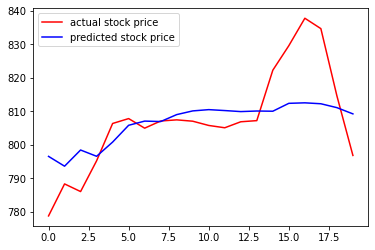

In [38]:
plt.plot(y_test, color ="red", label = "actual stock price")
plt.plot(ypred, color ="blue",label = "predicted stock price")
plt.legend()
plt.show()

In [35]:
test =  [343,456,756,678,786,456,567,343,767,123]
len(test)

10

In [36]:
test = np.array(test) 
test = test.reshape(-1,1)
test = np.reshape(test, (1,10,1))
yp = model.predict (test)
yp = sc.inverse_transform(yp)


In [37]:
yp

array([[781.16406]], dtype=float32)